In [ ]:
"""
RNC
Jesus Roberto Arriaga Villarreal
1995060
N4
"""

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

# Verificar las dimensiones de los datos
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
# Normalizar los valores de los píxeles a un rango de 0 a 1
train_data = train_data / 255.0
test_data = test_data / 255.0

# Añadir una dimensión extra para el canal de color (grayscale)
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

# Convertir las etiquetas a one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [4]:
# Definir la arquitectura de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_data, train_labels, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 69s 45ms/step - loss: 0.1731 - accuracy: 0.9458 - val_loss: 0.0606 - val_accuracy: 0.9811
Epoch 2/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.0455 - val_accuracy: 0.9869
Epoch 3/5
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0446 - val_accuracy: 0.9856
Epoch 4/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0373 - val_accuracy: 0.9885
Epoch 5/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0217 - accuracy: 0.9924 - val_loss: 0.0450 - val_accuracy: 0.9881


313/313 [==============================] - 4s 11ms/step - loss: 0.0331 - accuracy: 0.9899
Test accuracy: 0.9898999929428101
313/313 [==============================] - 2s 8ms/step


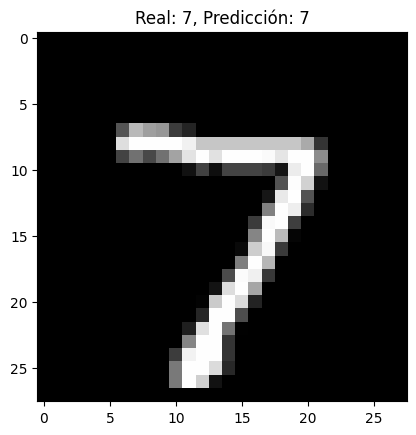

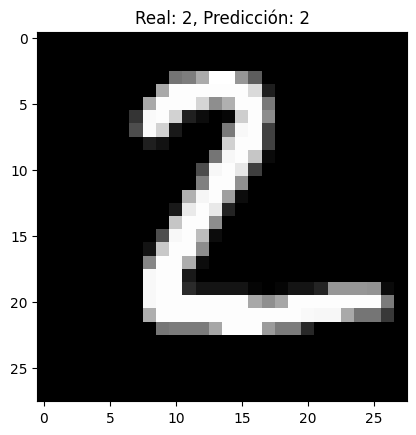

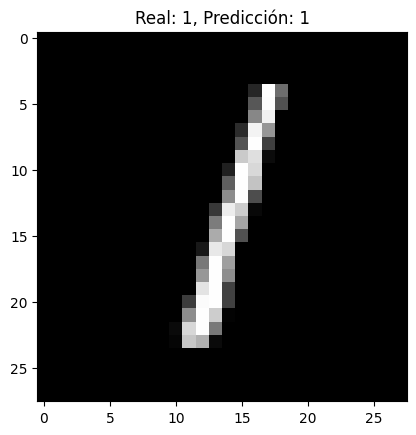

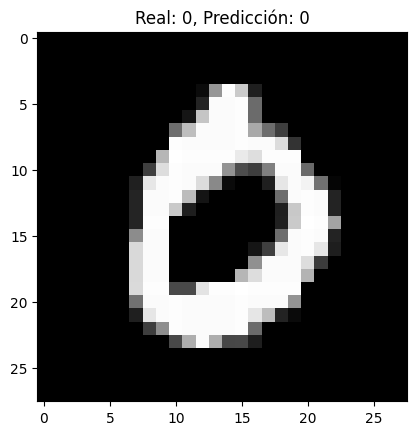

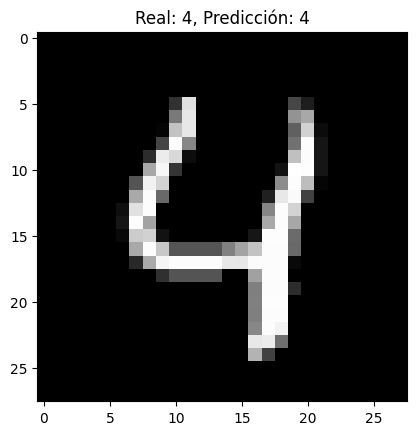

In [5]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")

# Realizar 5 predicciones y mostrar los resultados
predictions = model.predict(test_data)

for i in range(5):
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {np.argmax(test_labels[i])}, Predicción: {np.argmax(predictions[i])}")
    plt.show()


¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?                          
R= Utilicé 5 épocas

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?                                                                 
R= Obtuve un mejor rendimiento con este modelo, alrededor de un 1.20% más alto